In [ ]:
!pip install iteration-utilities
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
!pip install seaborn

In [19]:
from iteration_utilities import flatten
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
import json

In [29]:
def json_data_to_df(path):
  with open(path) as data_json:
    data = json.load(data_json)
  df = pd.json_normalize(flatten(data), meta=['class'])
  df[list(range(0, 32))] = pd.DataFrame(df.pop('frequencies').tolist()).astype(float)
  df.rename(columns={'class':  'isAlarm'}, inplace=True)
  return df

In [36]:
train_df = json_data_to_df('train.json')
validation_df = json_data_to_df('validation.json')
test_df = json_data_to_df('test.json')
all_df = pd.concat([train_df, validation_df, test_df])

frequencies  class
0      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  False
1      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  False
2      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  False
3      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  False
4      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  False
...                                                  ...    ...
28092  [150, 172, 188, 181, 151, 120, 107, 123, 125, ...  False
28093  [150, 172, 188, 181, 151, 120, 107, 123, 125, ...  False
28094  [147, 167, 182, 174, 144, 114, 101, 118, 121, ...  False
28095  [147, 167, 182, 174, 144, 114, 101, 118, 121, ...  False
28096  [143, 161, 175, 167, 138, 107, 94, 111, 114, 9...  False

[28097 rows x 2 columns]

frequencies  class
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   True
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   True
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   True
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   True
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   True
...                                                 ...    ...
9858  [125, 163, 184, 188, 195, 195, 182, 168, 155, ...  False
9859  [125, 163, 184, 188, 195, 195, 182, 168, 155, ...  False
9860  [157, 179, 187, 207, 217, 205, 194, 208, 202, ...  False
9861  [157, 179, 187, 207, 217, 205, 194, 208, 202, ...  False
9862  [189, 196, 201, 219, 223, 204, 198, 225, 221, ...  False

[9863 rows x 2 columns]

frequencies  class
0     [2, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  False
1     [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  False
2     [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  False
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  False
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  False
...                                                 ...    ...
9683  [0, 18, 29, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  False
9684  [0, 18, 29, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  False
9685  [0, 11, 22, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  False
9686  [0, 11, 22, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  False
9687  [0, 5, 16, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  False

[9688 rows x 2 columns]

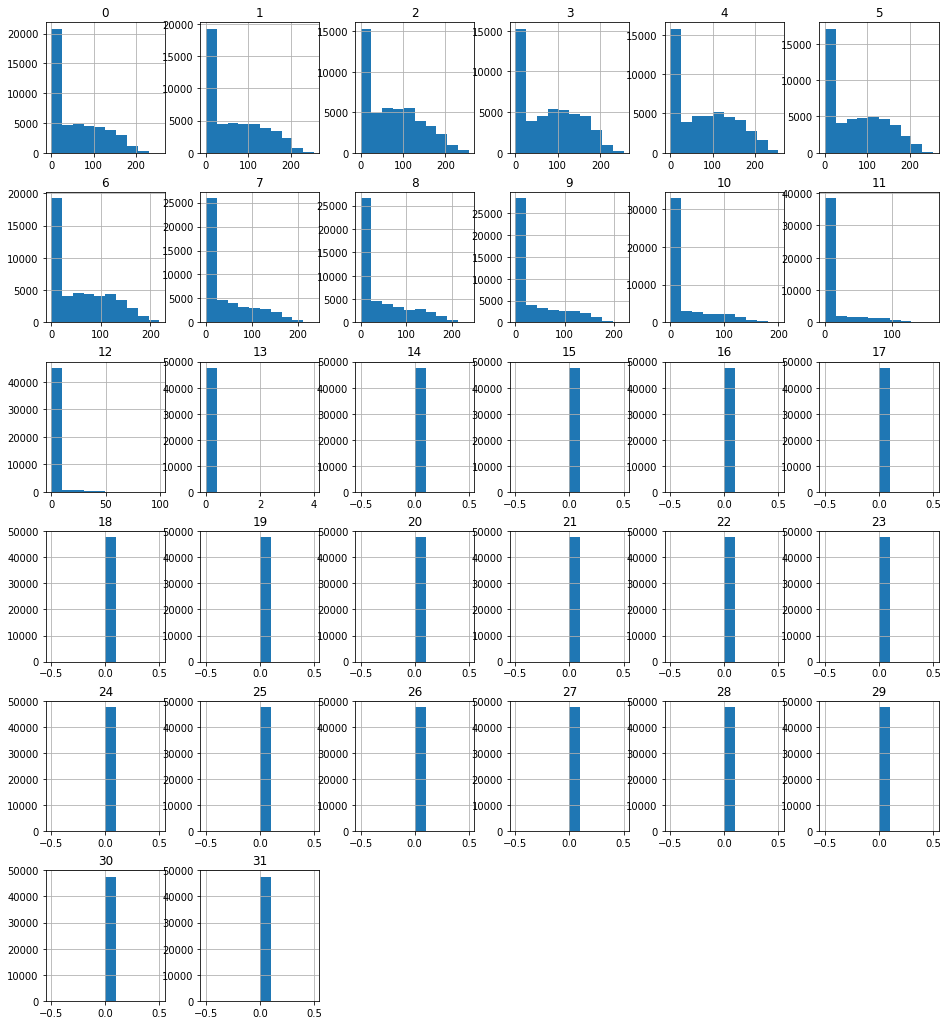

In [37]:
# Let's visualize the frequency distribution...

all_df[list(range(0,32))].hist(figsize = (16,18))

plt.show()

In [38]:
# It seems higher frequencies were not captured by my phone's microphone. Let's remove them.
all_df.drop(columns=list(range(13,32)), inplace=True)
train_df.drop(columns=list(range(13,32)), inplace=True)
validation_df.drop(columns=list(range(13,32)), inplace=True)
test_df.drop(columns=list(range(13,32)), inplace=True)

isAlarm
False    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
True     [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

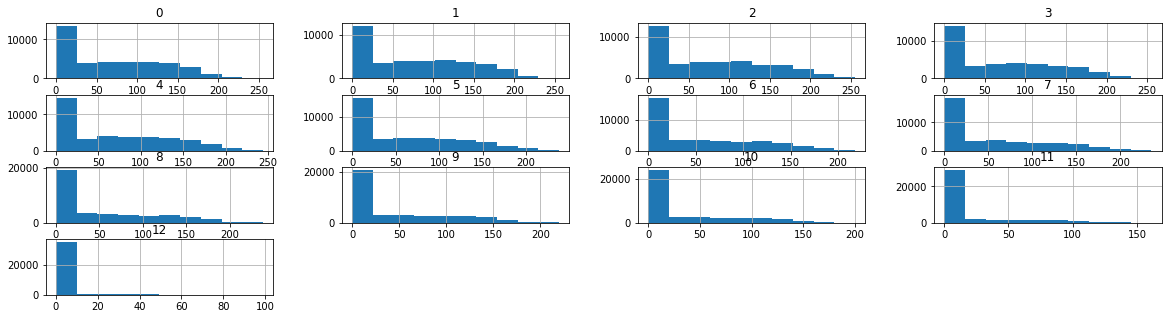

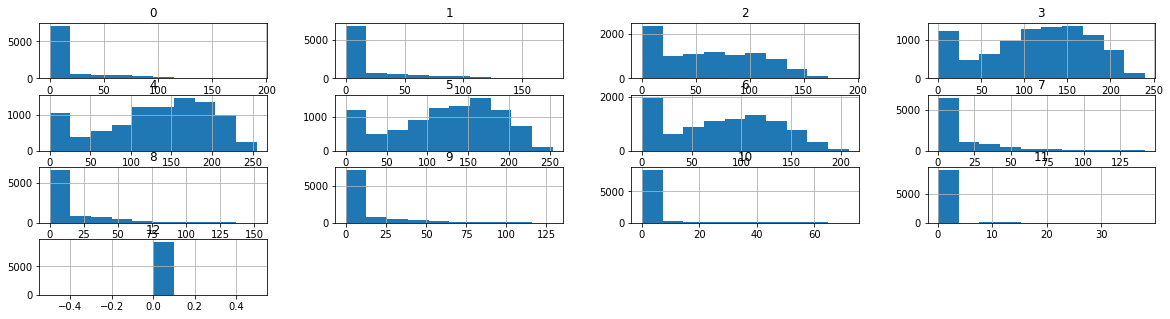

In [39]:
# Per class frequency distribution:
all_df.groupby('isAlarm').hist(figsize=(20,5))
# Frequencies in bins 3, 4, 5, 6 are dominant for alarm events.

In [40]:
all_df['isAlarm'].value_counts()

False    38324
True      9324
Name: isAlarm, dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical
from keras.preprocessing.sequence import TimeseriesGenerator
import collections, numpy

window_size = 60

def preprocess_df(dataframe):
  X = dataframe[range(0, 12)].to_numpy()
  scaler = StandardScaler().fit(X)
  X = scaler.transform(X)
  y = np.pad(dataframe.isAlarm.to_numpy()[window_size//2:], (False, window_size//2), 'constant')
  y = to_categorical(LabelEncoder().fit_transform(y))
  return X, y

x_train, y_train = preprocess_df(train_df)
x_validation, y_validation = preprocess_df(validation_df)
x_test, y_test = preprocess_df(test_df)

train_generator = TimeseriesGenerator(x_train, y_train, window_size, batch_size=128, shuffle=False)
validation_generator = TimeseriesGenerator(x_validation, y_validation, window_size, batch_size=128, shuffle=False)
test_generator = TimeseriesGenerator(x_test, y_test, window_size, batch_size=128, shuffle=False)
print(train_generator[0])

(array([[[-0.90174138, -0.93104291, -1.04015731, ..., -0.65657514,
         -0.55337485, -0.42847399],
        [-0.90174138, -0.93104291, -1.04015731, ..., -0.65657514,
         -0.55337485, -0.42847399],
        [-0.90174138, -0.93104291, -1.04015731, ..., -0.65657514,
         -0.55337485, -0.42847399],
        ...,
        [-0.90174138, -0.93104291, -1.04015731, ..., -0.65657514,
         -0.55337485, -0.42847399],
        [-0.90174138, -0.93104291, -1.04015731, ..., -0.65657514,
         -0.55337485, -0.42847399],
        [-0.90174138, -0.93104291, -1.04015731, ..., -0.65657514,
         -0.55337485, -0.42847399]],

       [[-0.90174138, -0.93104291, -1.04015731, ..., -0.65657514,
         -0.55337485, -0.42847399],
        [-0.90174138, -0.93104291, -1.04015731, ..., -0.65657514,
         -0.55337485, -0.42847399],
        [-0.90174138, -0.93104291, -1.04015731, ..., -0.65657514,
         -0.55337485, -0.42847399],
        ...,
        [-0.90174138, -0.93104291, -1.04015731, ..., 

In [42]:
display(x_validation[960])
display(y_validation[960])

array([ 0.60049034,  0.33813196, -0.10590863, -0.48350137, -0.62134538,
       -0.84173533, -0.95085286, -0.72807594, -0.69872274, -0.66353563,
       -0.5684992 , -0.42095955])

array([1., 0.], dtype=float32)

In [45]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size,12)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

history = model.fit_generator(train_generator, validation_data=validation_generator, epochs=100)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 58, 64)            2368      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 56, 64)            12352     
_________________________________________________________________
dropout_2 (Dropout)          (None, 56, 64)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 56, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3584)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               358500    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

KeyboardInterrupt: ignored

In [48]:
# Evalute on the test dataset

model.evaluate(test_generator)
Y_pred = model.predict(test_generator)

77/77 [==============================] - 1s 13ms/step - loss: 0.3055 - accuracy: 0.9145


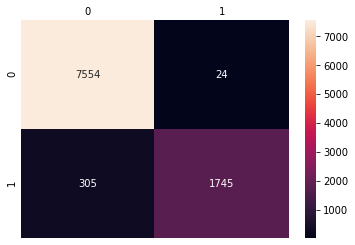

In [51]:
# Confusion matrix for the test dataset

ax = sn.heatmap(confusion_matrix(np.argmax(y_test[:-60], axis=1), np.argmax(Y_pred, axis=1)), annot=True, fmt='d')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.tick_params(length=0)
plt.show()

# ... more false positives than false negatives.

In [52]:
model.save('model.h5')